In [1]:
import magma as m
m.set_mantle_target("coreir")
m.set_codegen_debug_info(True)  # Include filename/lineno in coreir output
import mantle

class FullAdder(m.Circuit):
    name = "FullAdderExample"  # Note: We use a unique name here 
                               # to avoid conflict with the Circuit 
                               # called FullAdder that is a part of 
                               # the mantle standard library
    IO = ["a", m.In(m.Bit), "b", m.In(m.Bit), "cin", m.In(m.Bit),
          "out", m.Out(m.Bit), "cout", m.Out(m.Bit)]
    @classmethod
    def definition(io):
        # Generate the sum
        _sum = io.a ^ io.b ^ io.cin
        m.wire(_sum, io.out)
        # Generate the carry
        carry = (io.a & io.b) | (io.b & io.cin) | (io.a & io.cin)
        m.wire(carry, io.cout)

In [2]:
m.compile("build/FullAdder", FullAdder, output="coreir")
%cat build/FullAdder.json

{"top":"global.FullAdderExample",
"namespaces":{
  "global":{
    "modules":{
      "FullAdderExample":{
        "type":["Record",[
          ["a","BitIn"],
          ["b","BitIn"],
          ["cin","BitIn"],
          ["out","Bit"],
          ["cout","Bit"]
        ]],
        "instances":{
          "inst0":{
            "modref":"corebit.xor",
            "metadata":{"filename":"../mantle/mantle/coreir/logic.py","lineno":"245"}
          },
          "inst1":{
            "modref":"corebit.xor",
            "metadata":{"filename":"../mantle/mantle/coreir/logic.py","lineno":"245"}
          },
          "inst2":{
            "modref":"corebit.and",
            "metadata":{"filename":"../mantle/mantle/coreir/logic.py","lineno":"136"}
          },
          "inst3":{
            "modref":"corebit.and",
            "metadata":{"filename":"../mantle/mantle/coreir/logic.py","lineno":"136"}
          },
          "inst4":{
            "modref":"corebit.or",
            "metadata":{"filenam

In [3]:
m.compile("build/FullAdder", FullAdder, output="coreir-verilog")
%cat build/FullAdder.v



module corebit_and (
  input in0,
  input in1,
  output out
);
  assign out = in0 & in1;

endmodule //corebit_and

module corebit_or (
  input in0,
  input in1,
  output out
);
  assign out = in0 | in1;

endmodule //corebit_or

module corebit_xor (
  input in0,
  input in1,
  output out
);
  assign out = in0 ^ in1;

endmodule //corebit_xor

module FullAdderExample (
  input  a,
  input  b,
  input  cin,
  output  cout,
  output  out
);
  //Wire declarations for instance 'inst0' (Module corebit_xor)
  wire  inst0__in0;
  wire  inst0__in1;
  wire  inst0__out;
  corebit_xor inst0(
    .in0(inst0__in0),
    .in1(inst0__in1),
    .out(inst0__out)
  );

  //Wire declarations for instance 'inst1' (Module corebit_xor)
  wire  inst1__in0;
  wire  inst1__in1;
  wire  inst1__out;
  corebit_xor inst1(
    .in0(inst1__in0),
    .in1(inst1__in1),
    .out(inst1__out)
  );

  //Wire declarations for instance 'inst2' (Module corebit_and)
  wire  inst2__in0;
  wire  inst2__in1;
  wire  inst2__out;
  

In [4]:
from fault.test_vectors import generate_simulator_test_vectors
from bit_vector import BitVector

test_vectors_raw = [
    [0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 0, 1],
    [1, 0, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1],
    [1, 1, 1, 1, 1]
]

test_vectors = [
    [BitVector(x) for x in test_vector]
    for test_vector in test_vectors_raw
]

tests = generate_simulator_test_vectors(FullAdder, flatten=False)
print( "Success" if tests == test_vectors else "Failure" )

Success


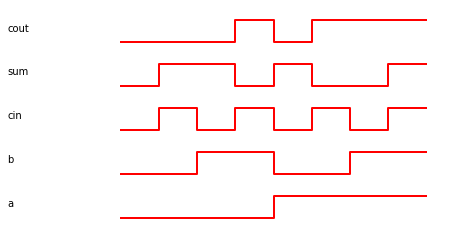

In [5]:
from magma.waveform import waveform

waveform(test_vectors_raw, ["a", "b", "cin", "sum", "cout"])